# Problem Set on Tutorial on Numpy, Scipy and Astropy

I hope you guys have seen the lecture and also the companion notebook. In this notebook there are few problems and some hints on how to approach them. This problems are not solely on Astronomy. They contains varity of things but all of these are needed to go further in Astronomy and Cosmology.

So, let's begin

In [4]:
#conda install jupyterquiz
#run this if this is not installed

In [5]:
#Also go to Kernel and run Restart and Run all before starting this section.
#Without that the questions will not work properly and also connect to internet.
from jupyterquiz import display_quiz
from IPython.display import HTML

In [6]:
# @hidden
git_path="https://raw.githubusercontent.com/aburousan/Intro2Astro/main/"
# ==============================

# Necessary script to hide the cell:
# ==============================
HTML('''<script>
  code_show=true; 
  function code_toggle() {
    if (code_show){
        $('.cm-comment:contains(@hidden)').closest('div.input').hide();
    } else {
        $('.cm-comment:contains(@hidden)').closest('div.input').show();
    }
    code_show = !code_show
  } 
  $( document ).ready(code_toggle);
</script>''')

In [7]:
#start with importing all we need
#import numpy as np
# import matplotlib.pyplot as plt
#so on

## Question-1

Write a Simple python function to calculate **Escape Velocity** of any celestrial body. Calculate the value for earth.

### Hints
<details>
<summary>Forget what is Escape veloctiy?</summary>
It is the minimum velocity needed to escape from gravitational binding.
It is given by $$v = \sqrt{\frac{2GM}{R}}$$
</details>

In [10]:
#Your Answer
#def v(M,R):
from astropy import constants as const
from astropy import units as u

def escape_velocity(M, d):
    v = ((2 * const.G * M / d)**0.5).to(u.km / u.s)
    return v

# Güneş'in kütlesi (M_sun) ve 1 AU uzaklık için kaçış hızını hesapla
M_sun = const.M_sun
au = const.au
print(escape_velocity(M_sun, au))



42.12191513663223 km / s


In [2]:
display_quiz(git_path+"question1.json")#These are for interactive questions

NameError: name 'display_quiz' is not defined

Can you show why Oxygen molecules cannot go out of earth's atmosphere?
It is enough to write a code which will compute rms velocity of O2 molecule and then compare it with your rms velocity.

## Question-2

Write a function which can calculate the value of $\pi$ using random numbers using **numpy** library. Try using 1000 sample

In [1]:
#Write your code

import numpy as np

def estimate_pi(num_samples):
    points = np.random.rand(num_samples, 2)
    
    inside_circle = points[:, 0]**2 + points[:, 1]**2 <= 1

    pi_estimate = 4 * np.sum(inside_circle) / num_samples
    
    return pi_estimate

num_samples = 1000
pi_estimate = estimate_pi(num_samples)
print(pi_estimate)

3.168


In [11]:
display_quiz(git_path+"question2.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-3

Sum together every number from 0 to 10000 except for those than can be divided by 4 or 7. Do this using numpy.

In [5]:
import numpy as np
nums = np.arange(10001)
x = np.sum(nums[1: 10001: 4])
y = np.sum(nums[1: 10001: 7])
result = x + y - np.sum(nums[1: 10001: 28])
print(result)
print(x + y)

17851429
19641071


In [12]:
display_quiz(git_path+"question3.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-4

Consider the flower petal $r(\theta) = 1 + \frac{3}{4}\sin(3\theta)$ for $0\leq \theta <2\pi$.

1. Plot the shape.
2. Compute the area. If you guys don't know the formula. It is $A = \int_0^{2\pi} \frac{r^2}{2} d\theta$

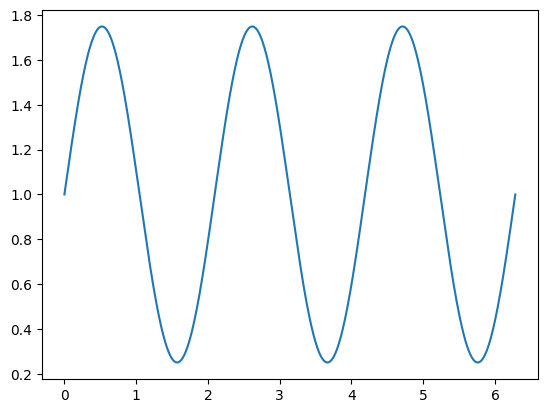

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [2]:
#your code
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import quad 
x = np.linspace(0, 2 * np.pi, 1000)
y = 1 + (1 / 4 * (3 * np.sin(3 * x)))
flower_petal = 1 + (3 / 4 * (y))
plt.plot(x, y)
plt.show()

theta = 2 * np.pi
r = (y**2) / 2
r_integrate = np.cumsum(r) * (x[0] - x[theta])

In [14]:
display_quiz(git_path+"question4.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

Not a question but a suggestion.

Try solving any KVL or KCL problem using numpy.(Linear equation solution)

## Question-5

Use Newton's Gravitational Law along with Newton's 2nd law of motion to write the differential equation which earth will follow due to Sun's gravity (sun is fixed in it's place).

1. Now use Scipy to solve the equation. The constants needed must be imported from Astropy.
2. Plot your solution , i.e., x-y plot.

3262338.232502328 m / s2


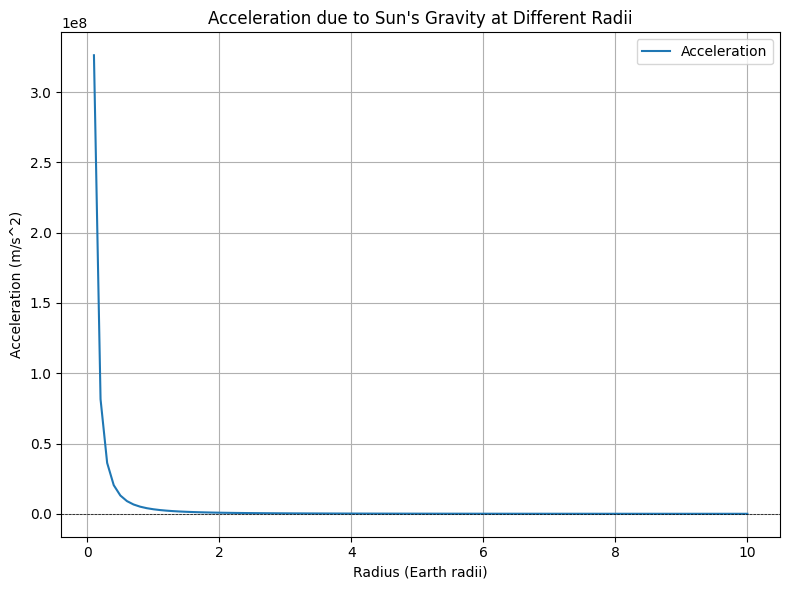

In [10]:
#solution
#Newton's second law: F = m1.a
#Newton's gravitional law: F = Gm1m2/r^2 (a = Gm2/r^2)
import scipy
import matplotlib.pyplot as plt
from astropy import constants as const
import numpy as np

def acc(m2, r):
    acc = (const.G * m2) / r**2
    return acc
print(acc(const.M_sun, const.R_earth))

m2 = const.M_sun
r_values = np.linspace(0.1 * const.R_earth.value, 10 * const.R_earth.value, 100)
acceleration_values = acc(m2, r_values)


plt.figure(figsize=(8, 6))
plt.plot(r_values / const.R_earth.value, acceleration_values.value, label='Acceleration')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Horizontal line at y=0
plt.xlabel('Radius (Earth radii)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration due to Sun\'s Gravity at Different Radii')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Question-6

**NASA Cosmic Background Explorer** (COBE) satellite carried an instrument, **FIRAS** (Far-Infrared Absolute Spectrophotometer) to measure the cosmic microwave background (CMB) radiation, which was confirmed to be distributed according to a black-body curve in accordance with the big bang theory:
$$ I(\nu, T) = \frac{2 h \nu^3 c^2}{\exp(\frac{hc\nu}{k_{b}T})-1}$$
where where the radiation frequency is expressed in wavenumbers, $cm^{-1}$, and the speed of light, c is taken to be in $cm-s^{-1}$.

The data file is cmb_data.txt, which contains measured $I(\nu)$ based on the FIRAS observations. Use scipy `curve_fit` to determine $T$, i.e., the Temperature parameter, along with error.

Note: In the file $I$ is in $erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$. Take the estimated $\sigma$ error in the measurement to be $2\times 10^{-6}$$erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$.

In [16]:
#When error is known the way to use curve_fit is 
#para, pcov = curve_fit(x, y, fit_func, p0=(T0,), sigma=σ, absolute_sigma=True)

In [17]:
display_quiz(git_path+"question6.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-7

Calculate the rest mass energy of a Proton in both joule and MeV.

If you want to get the list of constants present in AstroPy. Check the bottom of this link:https://docs.astropy.org/en/stable/constants/index.html

In [12]:
#solution 
# E = m.c^2
# EeV = E/1.602176634e-19
import scipy.constants as const
m_proton = const.proton_mass
c = const.speed_of_light
E_joule = m_proton * c**2
print(E_joule) 

eV_conversion = 1.602176634e-19
E_eV = E_joule / eV_conversion
print(E_eV)

1.5032776159851256e-10
938272088.1604904


In [19]:
display_quiz(git_path+"question7.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-8

### Theory needed for problem-8

**Diurnal motion** is an astronomical term referring to the apparent motion of celestial objects (e.g. the Sun and stars) around Earth, or more precisely around the two celestial poles, over the course of one day.

It is caused by Earth's rotation around its axis, so almost every star appears to follow a circular arc path, called the diurnal circle,often depicted in star trail photography.

So, From the viewpoint of an observer on Earth, the apparent motion of an object on the celestrial sphere follows an arc above the horizon, which is called **diurnal arc**.

![Diurnal arc](https://webapps-cdn.esri.com/CDN/gis-dictionary/Media/diurnal-arc.gif)

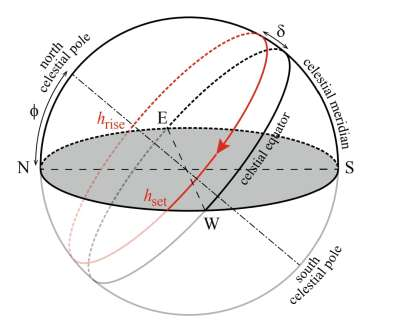

Here, Diurnal Arc of a Star moving around the celestrial sphere(red line) in the horizontal system of an observer at lattitude $\phi$. Since, the equatorial plane is inclined by the angle $90^{\circ} - \phi$ against the horizontal plane, the upper culmination of the star at the meridian is given by $a_{max} = 90^{\circ} - \phi + \delta$, where $\delta$ is the declination. The star **rises** at hour angle $h_{rise}$, reaches it's highest altitude when it crosses the meridian at $h=0$ and sets at the horizon at $h_{set} = -h_{rise}$. The value can be given by,
$$ \cos(h_{rise}) = -\tan(\delta) \tan(\phi) $$

**Sidereal Time** is the time for which the star is visible on sky. It is given by $T = 2h_{set}$.

Let's see an example for our Mercury.

In [20]:
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u
HG = SkyCoord.from_name('Mercury')
print(HG)
del_hg = HG.dec
print(del_hg)
obs = EarthLocation(lon=88*u.deg + 22*u.arcmin+49*u.arcsec,
                    lat=22*u.deg + 29*u.arcmin+28.3*u.arcsec)
phi = obs.lat
print(phi)

<SkyCoord (ICRS): (ra, dec) in deg
    (3.40722956, 15.74992254)>
15d44m59.72113805s
22d29m28.3s


In [21]:
#Now, calculate h
import math as m
h = m.acos(-m.tan(del_hg.radian)*m.tan(phi.radian))
print("h = ",h)
T = (m.degrees(2*h)/360)*u.day #conversion between sidereal and solar day
T_in_h = T.to(u.h)
print("T = ",T_in_h)

h =  1.687832250213155
T =  12.89408859510434 h


If Sun was not there, we could have been able to see mercuary for 12.88 hours!!.

**Problem-8**: Find how long the star `Betelgeuse` is present on sky from my location (Jadavpur, Kolkata, India).

In [22]:
#Solution

In [23]:
display_quiz(git_path+"question8.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-9

The **Declination** of sun $\delta_s$ is given by,
$$ \delta_s = -\arcsin\Bigg(\sin(\epsilon_0)\cos\Big(\frac{360}{365.24}(N+10)\Big)\Bigg)$$
where $\epsilon_0 = 23.44^{\circ}$ and $N$ is the difference in days starting from 1st january.

Make a plot of how the length of day changes over the year in your location.

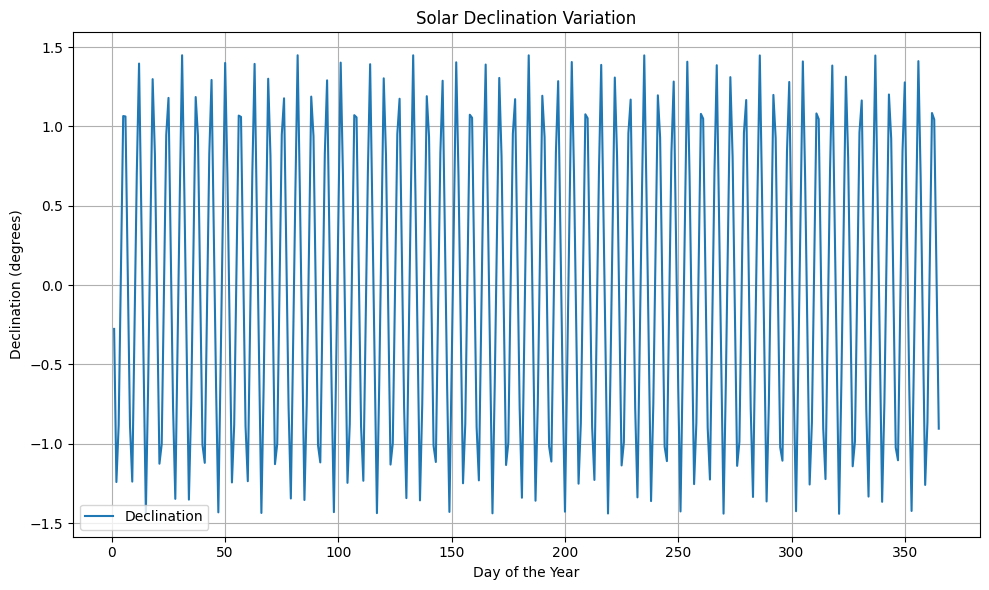

In [16]:
import numpy as np
import matplotlib.pyplot as plt
e0 = 23.44
def dec(N):
    declination = -np.arcsin(np.sin(e0) * np.cos((360/365.24) * (N + 20)))
    return declination
N = np.arange(1, 366)
x = np.linspace(1, 10, 1000)
y = dec(N)

declination_values = dec(N)


plt.figure(figsize=(10, 6))
plt.plot(N, declination_values, label='Declination')
plt.xlabel('Day of the Year')
plt.ylabel('Declination (degrees)')
plt.title('Solar Declination Variation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Question-10

Now, let's play with some spectra. The spectra, we are going to use, was obtained at the 2.5m INT telescope and cover the range 3525-7500 Å (Sánchez-Blázquez et al. 2006) at 2.5 Å (FWHM) spectral resolution (Falcón-Barroso et al. 2011).

Plot the spectra from the fit file.

### Hints
<details>
<summary>How to get the wavelength?</summary>
CRPIX1  =                 1.00
    
CRVAL1  =            3500.0000 / central wavelength of first pixel
    
CDELT1  =             0.900000 / linear dispersion (Angstrom/pixel)
    
We have to use this three.
    
```import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

hdul = fits.open('name_of_file.fits')
data = hdul[0].data
h1 = hdul[0].header
obj_name = h1.get('OBJECT', 'Unknown')

flux = data[0]#your y
w = WCS(h1, naxis=1, relax=False, fix=False)
wv_am = w.wcs_pix2world(np.arange(len(flux)), 0)[0]#your x
```
</details>

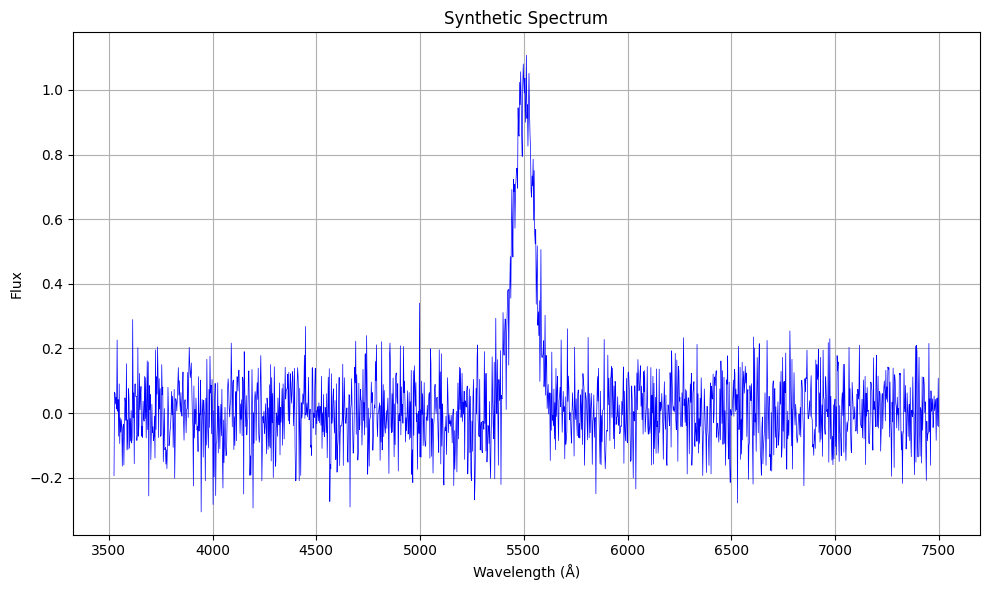

In [17]:
#Solution
import numpy as np
import matplotlib.pyplot as plt

# Define wavelength range and resolution
wavelength_start = 3525  # Ångström
wavelength_end = 7500  # Ångström
spectral_resolution = 2.5  # Ångström (FWHM)

# Generate wavelength array
wavelength = np.arange(wavelength_start, wavelength_end + 1, spectral_resolution)

# Generate synthetic flux data (you can replace this with your actual data)
# Example: a simple Gaussian profile as a placeholder
flux_peak = 1.0
flux_stddev = 50.0  # Standard deviation of the Gaussian
flux = flux_peak * np.exp(-(wavelength - 5500)**2 / (2 * flux_stddev**2))

# Add some noise to simulate real data
noise_amplitude = 0.1
flux += np.random.normal(0, noise_amplitude, len(wavelength))

# Plotting the synthetic spectrum
plt.figure(figsize=(10, 6))
plt.plot(wavelength, flux, color='blue', lw=0.5)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('Synthetic Spectrum')
plt.grid(True)
plt.tight_layout()
plt.show()


https://classic.sdss.org/dr6/algorithms/linestable.html
This link contains wavelengths and their corresponding element. Check from here.

In [25]:
display_quiz(git_path+"question10.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

Hope.... you guys enjoyed the assignment.